In [41]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [7]:
from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.html import partition_html
from unstructured.partition.pdf import partition_pdf

from unstructured.staging.base import dict_to_elements

In [8]:
from Utils import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()
OPENAI_API_KEY = utils.get_openai_api_key()

# Print the values to verify
#print(f"DLAI_API_KEY: {DLAI_API_KEY}")
#print(f"DLAI_API_URL: {DLAI_API_URL}")
#print(f"OPENAI_API_KEY: {OPENAI_API_KEY}")

s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

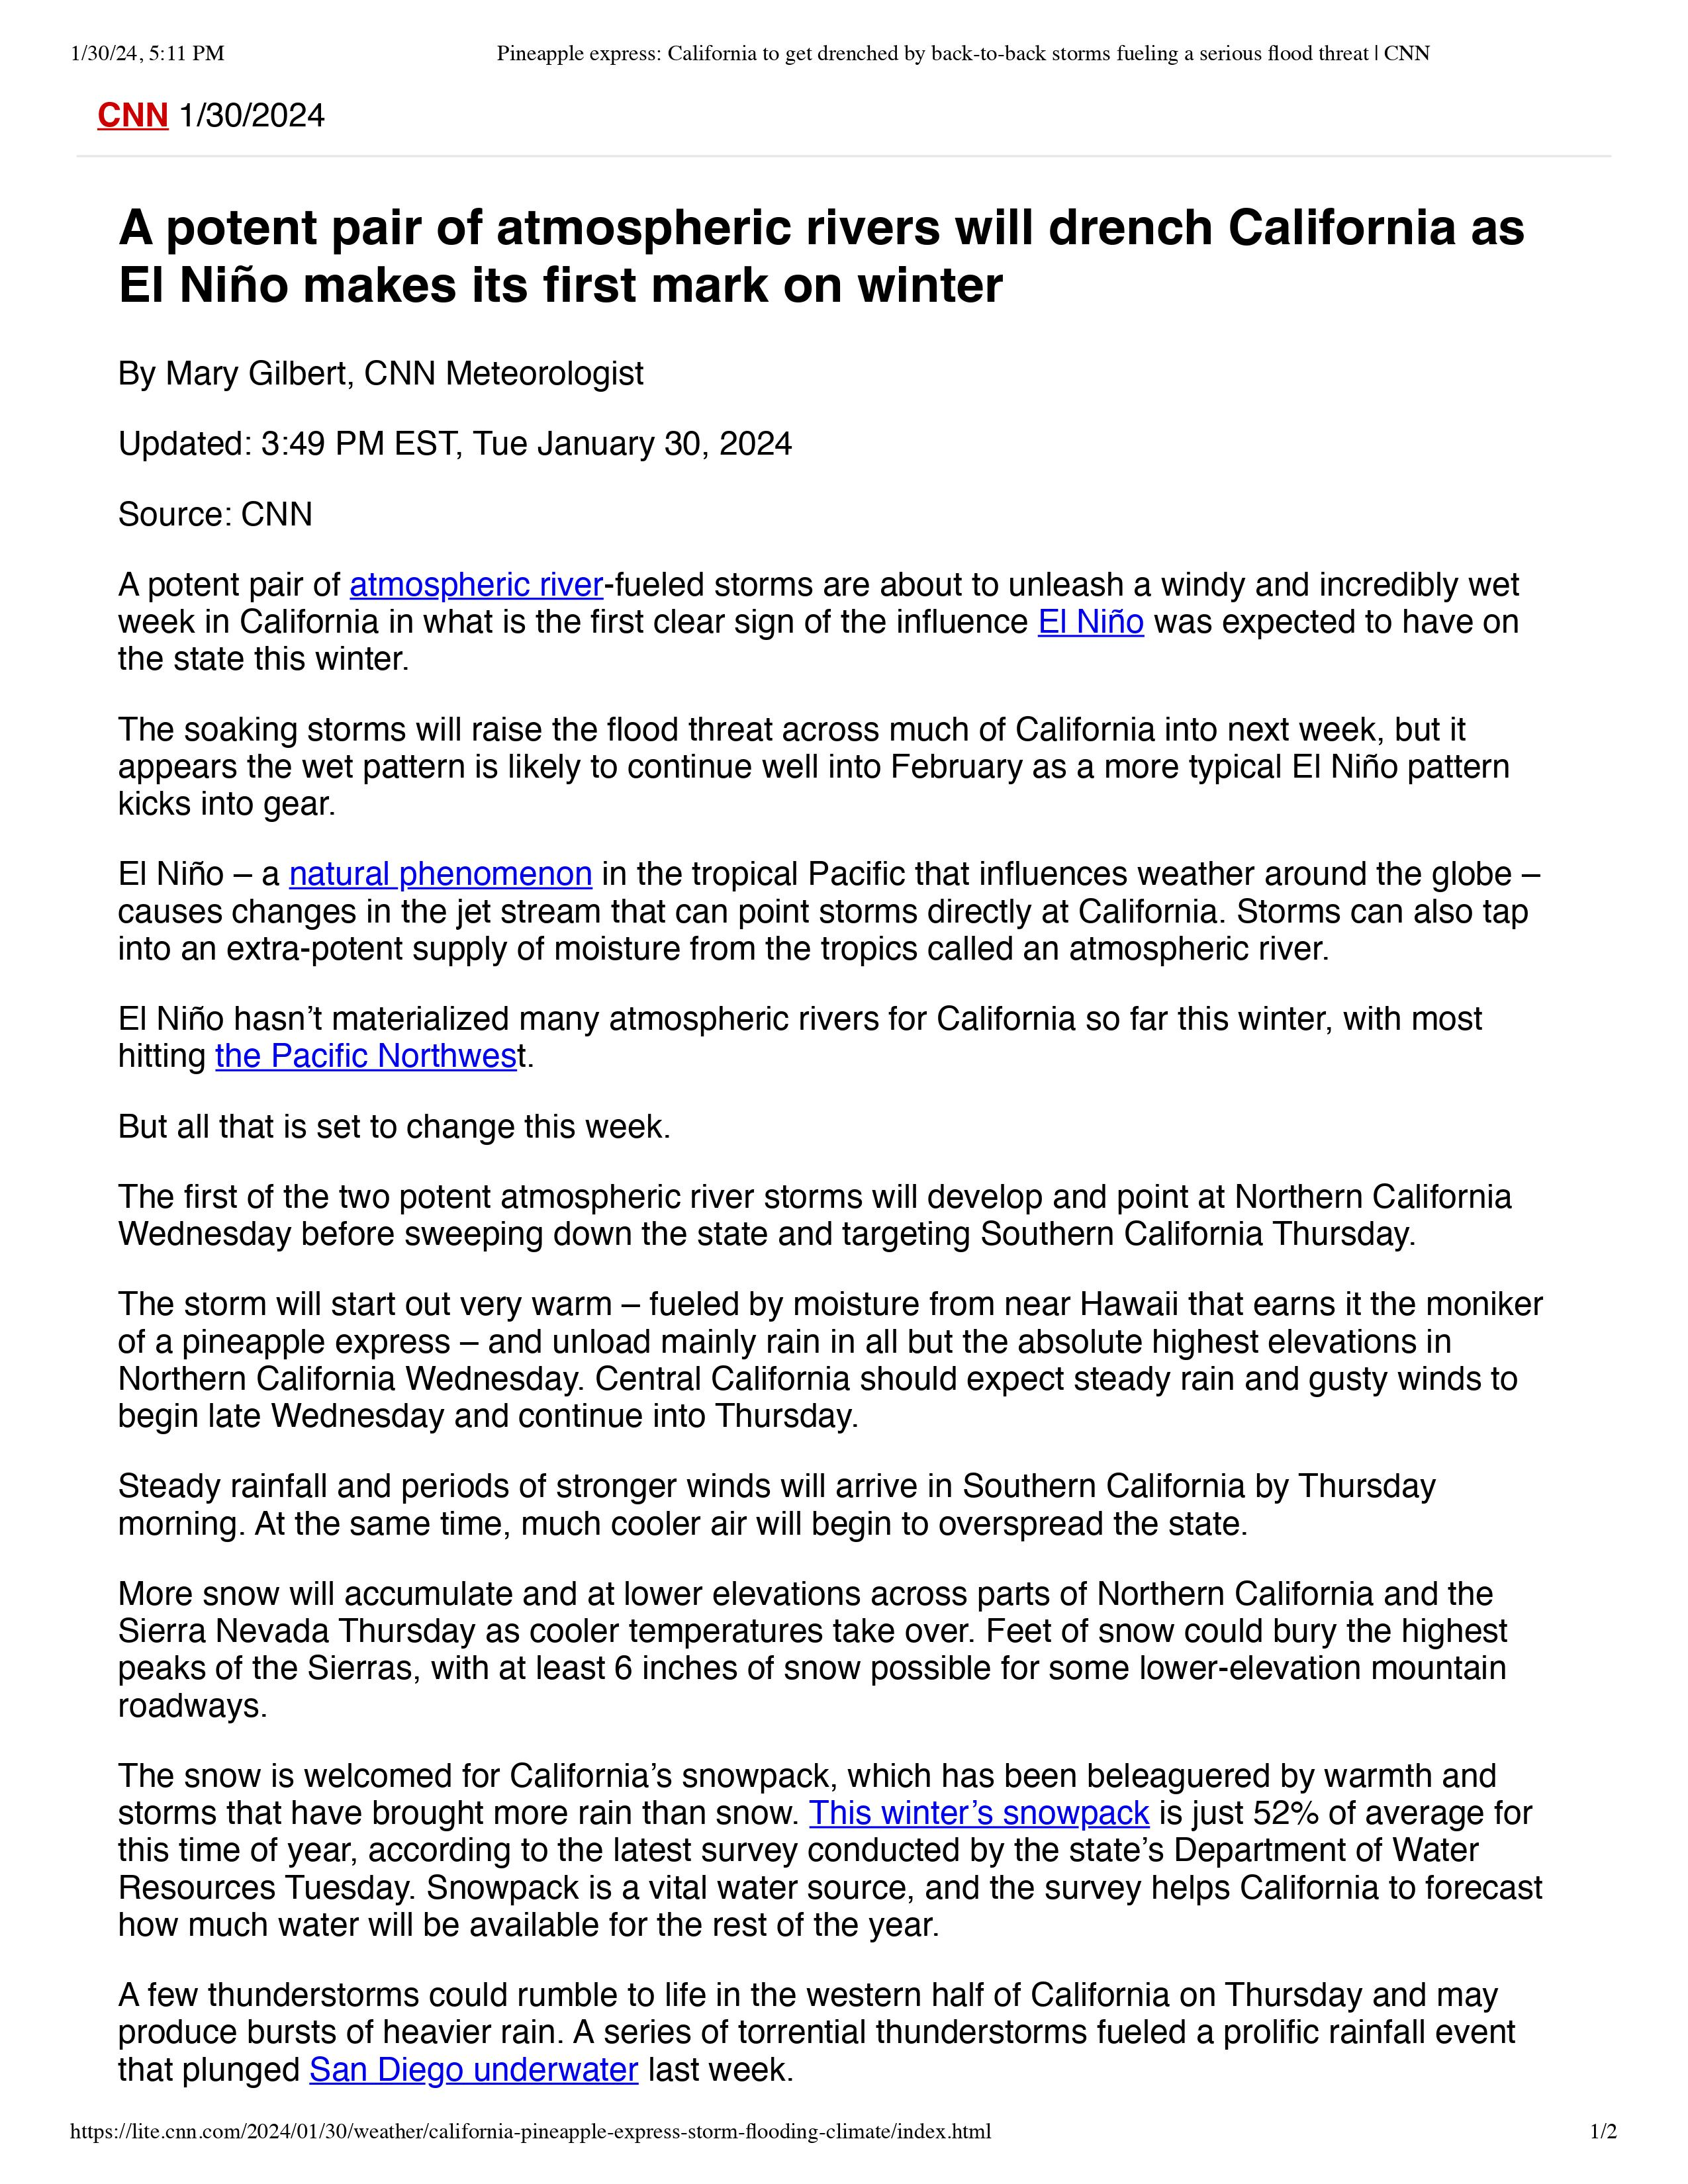

In [9]:
from IPython.display import Image
Image(filename="docs/el_nino-images-0.jpg", height=600, width=600) 

In [10]:
filename = "docs/el_nino.html"
html_elements = partition_html(filename=filename)

In [11]:
for element in html_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

UNCATEGORIZEDTEXT: CNN 1/30/2024
TITLE: A potent pair of atmospheric rivers will drench California as El NiÃ±o makes its first mark on winter
TITLE: By Mary Gilbert, CNN Meteorologist
TITLE: Updated: 3:49 PM EST, Tue January 30, 2024
TITLE: Source: CNN
NARRATIVETEXT: A potent pair of atmospheric river-fueled storms are about to unleash a windy and incredibly wet week in California in what is the first clear sign of the influence El NiÃ±o was expected to have on the state this winter.
NARRATIVETEXT: The soaking storms will raise the flood threat across much of California into next week, but it appears the wet pattern is likely to continue well into February as a more typical El NiÃ±o pattern kicks into gear.
NARRATIVETEXT: El NiÃ±o â aÂ natural phenomenonÂ in the tropical Pacific that influences weather around the globe â causes changes in the jet stream that can point storms directly at California. Storms can also tap into an extra-potent supply of moisture from the tropics called 

In [12]:
filename = "docs/el_nino.pdf"
pdf_elements = partition_pdf(filename=filename, strategy="fast")

INFO: pikepdf C++ to Python logger bridge initialized


In [13]:
for element in pdf_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

HEADER: 1/30/24, 5:11 PM
HEADER: Pineapple express: California to get drenched by back-to-back storms fueling a serious ﬂood threat | CNN
HEADER: CNN 1/30/2024
NARRATIVETEXT: A potent pair of atmospheric rivers will drench California as El Niño makes its ﬁrst mark on winter
TITLE: By Mary Gilbert, CNN Meteorologist
TITLE: Updated: 3:49 PM EST, Tue January 30, 2024
TITLE: Source: CNN
NARRATIVETEXT: A potent pair of atmospheric river-fueled storms are about to unleash a windy and incredibly wet week in California in what is the ﬁrst clear sign of the inﬂuence El Niño was expected to have on the state this winter.
NARRATIVETEXT: The soaking storms will raise the ﬂood threat across much of California into next week, but it appears the wet pattern is likely to continue well into February as a more typical El Niño pattern kicks into gear.
NARRATIVETEXT: El Niño – a natural phenomenon in the tropical Paciﬁc that inﬂuences weather around the globe – causes changes in the jet stream that can po

In [14]:
with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
)

try:
    resp = s.general.partition(req)
    dld_elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

INFO: Preparing to split document for partition.
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 2 (2 total)
INFO: Determined optimal split size of 2 pages.
INFO: Document has too few pages (2) to be split efficiently. Partitioning without split.
INFO: Successfully partitioned the document.


In [15]:
for element in dld_elements[:10]:
    print(f"{element.category.upper()}: {element.text}")

HEADER: 1/30/24, 5:11 PM
HEADER: CNN 1/30/2024
HEADER: Pineapple express: California to get drenched by back-to-back storms fueling a serious ﬂood threat | CNN
TITLE: A potent pair of atmospheric rivers will drench California as El Niño makes its ﬁrst mark on winter
NARRATIVETEXT: By Mary Gilbert, CNN Meteorologist
NARRATIVETEXT: Updated: 3:49 PM EST, Tue January 30, 2024
NARRATIVETEXT: Source: CNN
NARRATIVETEXT: A potent pair of atmospheric river-fueled storms are about to unleash a windy and incredibly wet week in California in what is the ﬁrst clear sign of the inﬂuence El Niño was expected to have on the state this winter.
NARRATIVETEXT: The soaking storms will raise the ﬂood threat across much of California into next week, but it appears the wet pattern is likely to continue well into February as a more typical El Niño pattern kicks into gear.
NARRATIVETEXT: El Niño – a natural phenomenon in the tropical Paciﬁc that inﬂuences weather around the globe – causes changes in the jet st

In [16]:
import collections

In [17]:
len(html_elements)

31

In [18]:
html_categories = [el.category for el in html_elements]
collections.Counter(html_categories).most_common()

[('NarrativeText', 23), ('Title', 7), ('UncategorizedText', 1)]

In [19]:
len(dld_elements)

39

In [20]:
dld_categories = [el.category for el in dld_elements]
collections.Counter(dld_categories).most_common()

[('NarrativeText', 28), ('Header', 6), ('Title', 4), ('Footer', 1)]

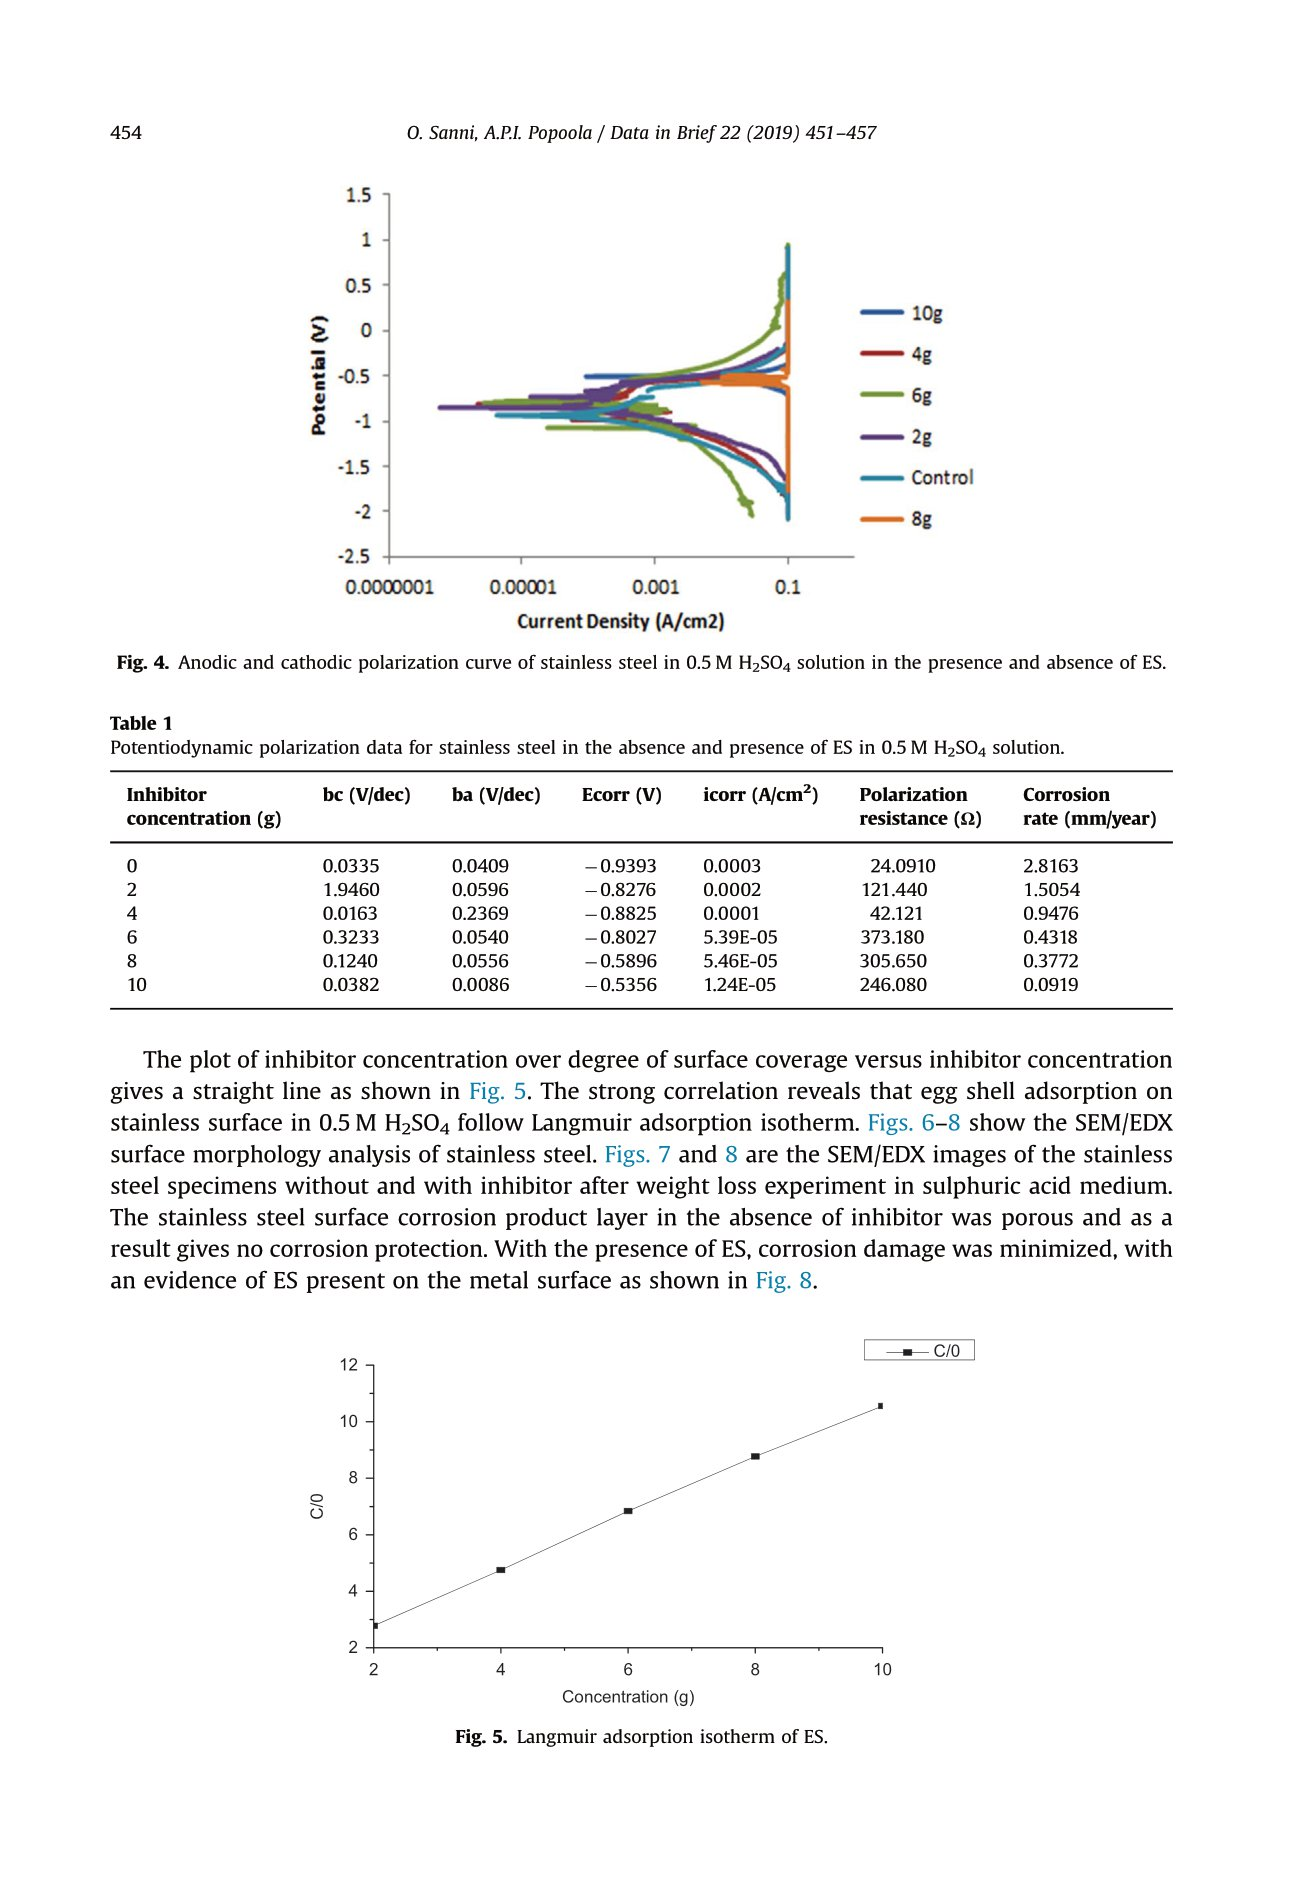

In [21]:
from IPython.display import Image
Image(filename="docs/embedded-images-tables.jpg", height=600, width=600) 

In [22]:
filename = "docs/embedded-images-tables.pdf"

with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
    skip_infer_table_types=[],
    pdf_infer_table_structure=True,
)

try:
    resp = s.general.partition(req)
    elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

INFO: Preparing to split document for partition.
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 1 (1 total)
INFO: Determined optimal split size of 2 pages.
INFO: Document has too few pages (1) to be split efficiently. Partitioning without split.
INFO: Successfully partitioned the document.


In [23]:
tables = [el for el in elements if el.category == "Table"]

In [24]:
tables[0].text

'Inhibitor Polarization Corrosion be (V/dec) ba (V/dec) Ecorr (V) icorr (AJcm?) concentration (g) resistance (Q) rate (mmj/year) 0.0335 0.0409 —0.9393 0.0003 24.0910 2.8163 1.9460 0.0596 .8276 0.0002 121.440 1.5054 0.0163 0.2369 .8825 0.0001 42121 0.9476 s NO 03233 0.0540 —0.8027 5.39E-05 373.180 0.4318 0.1240 0.0556 .5896 5.46E-05 305.650 0.3772 = 5 0.0382 0.0086 .5356 1.24E-05 246.080 0.0919'

In [25]:
table_html = tables[0].metadata.text_as_html

In [26]:
from io import StringIO 
from lxml import etree

parser = etree.XMLParser(remove_blank_text=True)
file_obj = StringIO(table_html)
tree = etree.parse(file_obj, parser)
print(etree.tostring(tree, pretty_print=True).decode())

<table>
  <thead>
    <tr>
      <th>Inhibitor concentration (g)</th>
      <th>be (V/dec)</th>
      <th>ba (V/dec)</th>
      <th>Ecorr (V)</th>
      <th>icorr (AJcm?)</th>
      <th>Polarization resistance (Q)</th>
      <th>Corrosion rate (mmj/year)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td/>
      <td>0.0335</td>
      <td>0.0409</td>
      <td>&#8212;0.9393</td>
      <td>0.0003</td>
      <td>24.0910</td>
      <td>2.8163</td>
    </tr>
    <tr>
      <td>NO</td>
      <td>1.9460</td>
      <td>0.0596</td>
      <td>&#8212;0.8276</td>
      <td>0.0002</td>
      <td>121.440</td>
      <td>1.5054</td>
    </tr>
    <tr>
      <td/>
      <td>0.0163</td>
      <td>0.2369</td>
      <td>&#8212;0.8825</td>
      <td>0.0001</td>
      <td>42121</td>
      <td>0.9476</td>
    </tr>
    <tr>
      <td>s</td>
      <td>03233</td>
      <td>0.0540</td>
      <td>&#8212;0.8027</td>
      <td>5.39E-05</td>
      <td>373.180</td>
      <td>0.4318</td>
    </tr>
    <tr>
      

In [27]:
from IPython.core.display import HTML
HTML(table_html)

Inhibitor concentration (g),be (V/dec),ba (V/dec),Ecorr (V),icorr (AJcm?),Polarization resistance (Q),Corrosion rate (mmj/year)
,0.0335,0.0409,—0.9393,0.0003,24.0910,2.8163
NO,1.9460,0.0596,—0.8276,0.0002,121.440,1.5054
,0.0163,0.2369,—0.8825,0.0001,42121,0.9476
s,03233,0.0540,—0.8027,5.39E-05,373.180,0.4318
,0.1240,0.0556,—0.5896,5.46E-05,305.650,0.3772
= 5,0.0382,0.0086,—0.5356,1.24E-05,246.080,0.0919


In [28]:
from langchain_openai import ChatOpenAI
from langchain_core.documents import Document
from langchain.chains.summarize import load_summarize_chain

In [29]:
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-1106")
chain = load_summarize_chain(llm, chain_type="stuff")
chain.invoke([Document(page_content=table_html)])

INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'input_documents': [Document(page_content='<table><thead><tr><th>Inhibitor concentration (g)</th><th>be (V/dec)</th><th>ba (V/dec)</th><th>Ecorr (V)</th><th>icorr (AJcm?)</th><th>Polarization resistance (Q)</th><th>Corrosion rate (mmj/year)</th></tr></thead><tbody><tr><td></td><td>0.0335</td><td>0.0409</td><td>—0.9393</td><td>0.0003</td><td>24.0910</td><td>2.8163</td></tr><tr><td>NO</td><td>1.9460</td><td>0.0596</td><td>—0.8276</td><td>0.0002</td><td>121.440</td><td>1.5054</td></tr><tr><td></td><td>0.0163</td><td>0.2369</td><td>—0.8825</td><td>0.0001</td><td>42121</td><td>0.9476</td></tr><tr><td>s</td><td>03233</td><td>0.0540</td><td>—0.8027</td><td>5.39E-05</td><td>373.180</td><td>0.4318</td></tr><tr><td></td><td>0.1240</td><td>0.0556</td><td>—0.5896</td><td>5.46E-05</td><td>305.650</td><td>0.3772</td></tr><tr><td>= 5</td><td>0.0382</td><td>0.0086</td><td>—0.5356</td><td>1.24E-05</td><td>246.080</td><td>0.0919</td></tr></tbody></table>')],
 'output_text': 'The table provides data on 

In [39]:
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain
from langchain_core.documents import Document
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.memory import ConversationBufferMemory


In [42]:
# Create a document with the table content
doc = Document(page_content=table_html)

# Initialize embeddings and Chroma vector store
embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)
vector_store = Chroma(embedding_function=embeddings)

# Add document to the vector store
vector_store.add_texts([doc.page_content])

# Create a retriever
retriever = vector_store.as_retriever()

# Set up memory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# Create the conversational retrieval chain
chain = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory=memory
)

# Example question
question = "What is the value of ba for an Inhibitor concentration of 0?"

# Ask the question
response = chain({"question": question})
print(response['answer'])

INFO: HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The value of ba for an Inhibitor concentration of 0 is 0.0409 V/dec.
